In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree # importing the tree module from sklearn
from sklearn import metrics # importing the metrics module from sklearn
from sklearn.model_selection import train_test_split # importing the train_test_split function from sklearn's model_selection module

In [5]:
df = pd.read_csv('data/News_dataset/initial_features.csv')

In [7]:
df.head()

,title,text,subject,label,text_length,title_length,length_phrases_no_punctuation_text,length_phrases_no_punctuation_title,qtt_numbers,qtt_noms_propis,qtt_punt,stopwords,emotional,repeated,capital_title,reference_count,word_length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,True,4659,64,17.904762,3.666667,17,88,113,307,0,0,4,3,4.914921
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,True,4077,64,17.081081,3.333333,9,71,77,253,0,2,4,2,5.237500
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,True,2789,60,20.909091,2.750000,2,75,47,202,0,1,7,2,4.847639
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,True,2461,59,18.000000,9.000000,3,75,51,156,1,0,8,2,5.197943
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,True,5204,69,14.982759,11.000000,34,92,128,353,0,3,4,4,4.752554


In [9]:
X = df.iloc[:,4:]

X

,text_length,title_length,length_phrases_no_punctuation_text,length_phrases_no_punctuation_title,qtt_numbers,qtt_noms_propis,qtt_punt,stopwords,emotional,repeated,capital_title,reference_count,word_length
0,4659,64,17.904762,3.666667,17,88,113,307,0,0,4,3,4.914921
1,4077,64,17.081081,3.333333,9,71,77,253,0,2,4,2,5.237500
2,2789,60,20.909091,2.750000,2,75,47,202,0,1,7,2,4.847639
3,2461,59,18.000000,9.000000,3,75,51,156,1,0,8,2,5.197943
4,5204,69,14.982759,11.000000,34,92,128,353,0,3,4,4,4.752554
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44883,3237,61,27.894737,10.000000,7,62,47,216,3,1,13,1,4.914657
44884,1684,81,23.000000,12.000000,5,24,42,136,1,0,15,1,4.364821
44885,25065,85,29.836879,14.000000,37,476,527,1873,0,19,12,12,4.719261
44886,2685,67,21.272727,12.000000,18,54,61,190,0,0,9,6,4.495798


In [11]:
y = df['label']

y

0        True
1        True
2        True
3        True
4        True
         ... 
44883    Fake
44884    Fake
44885    Fake
44886    Fake
44887    Fake
Name: label, Length: 44888, dtype: object

In [25]:
dtree = tree.DecisionTreeClassifier() 
dtree.fit(X, y)
print("Accuracy on training set: {:.3f}".format(dtree.score(X, y)))

Accuracy on training set: 1.000


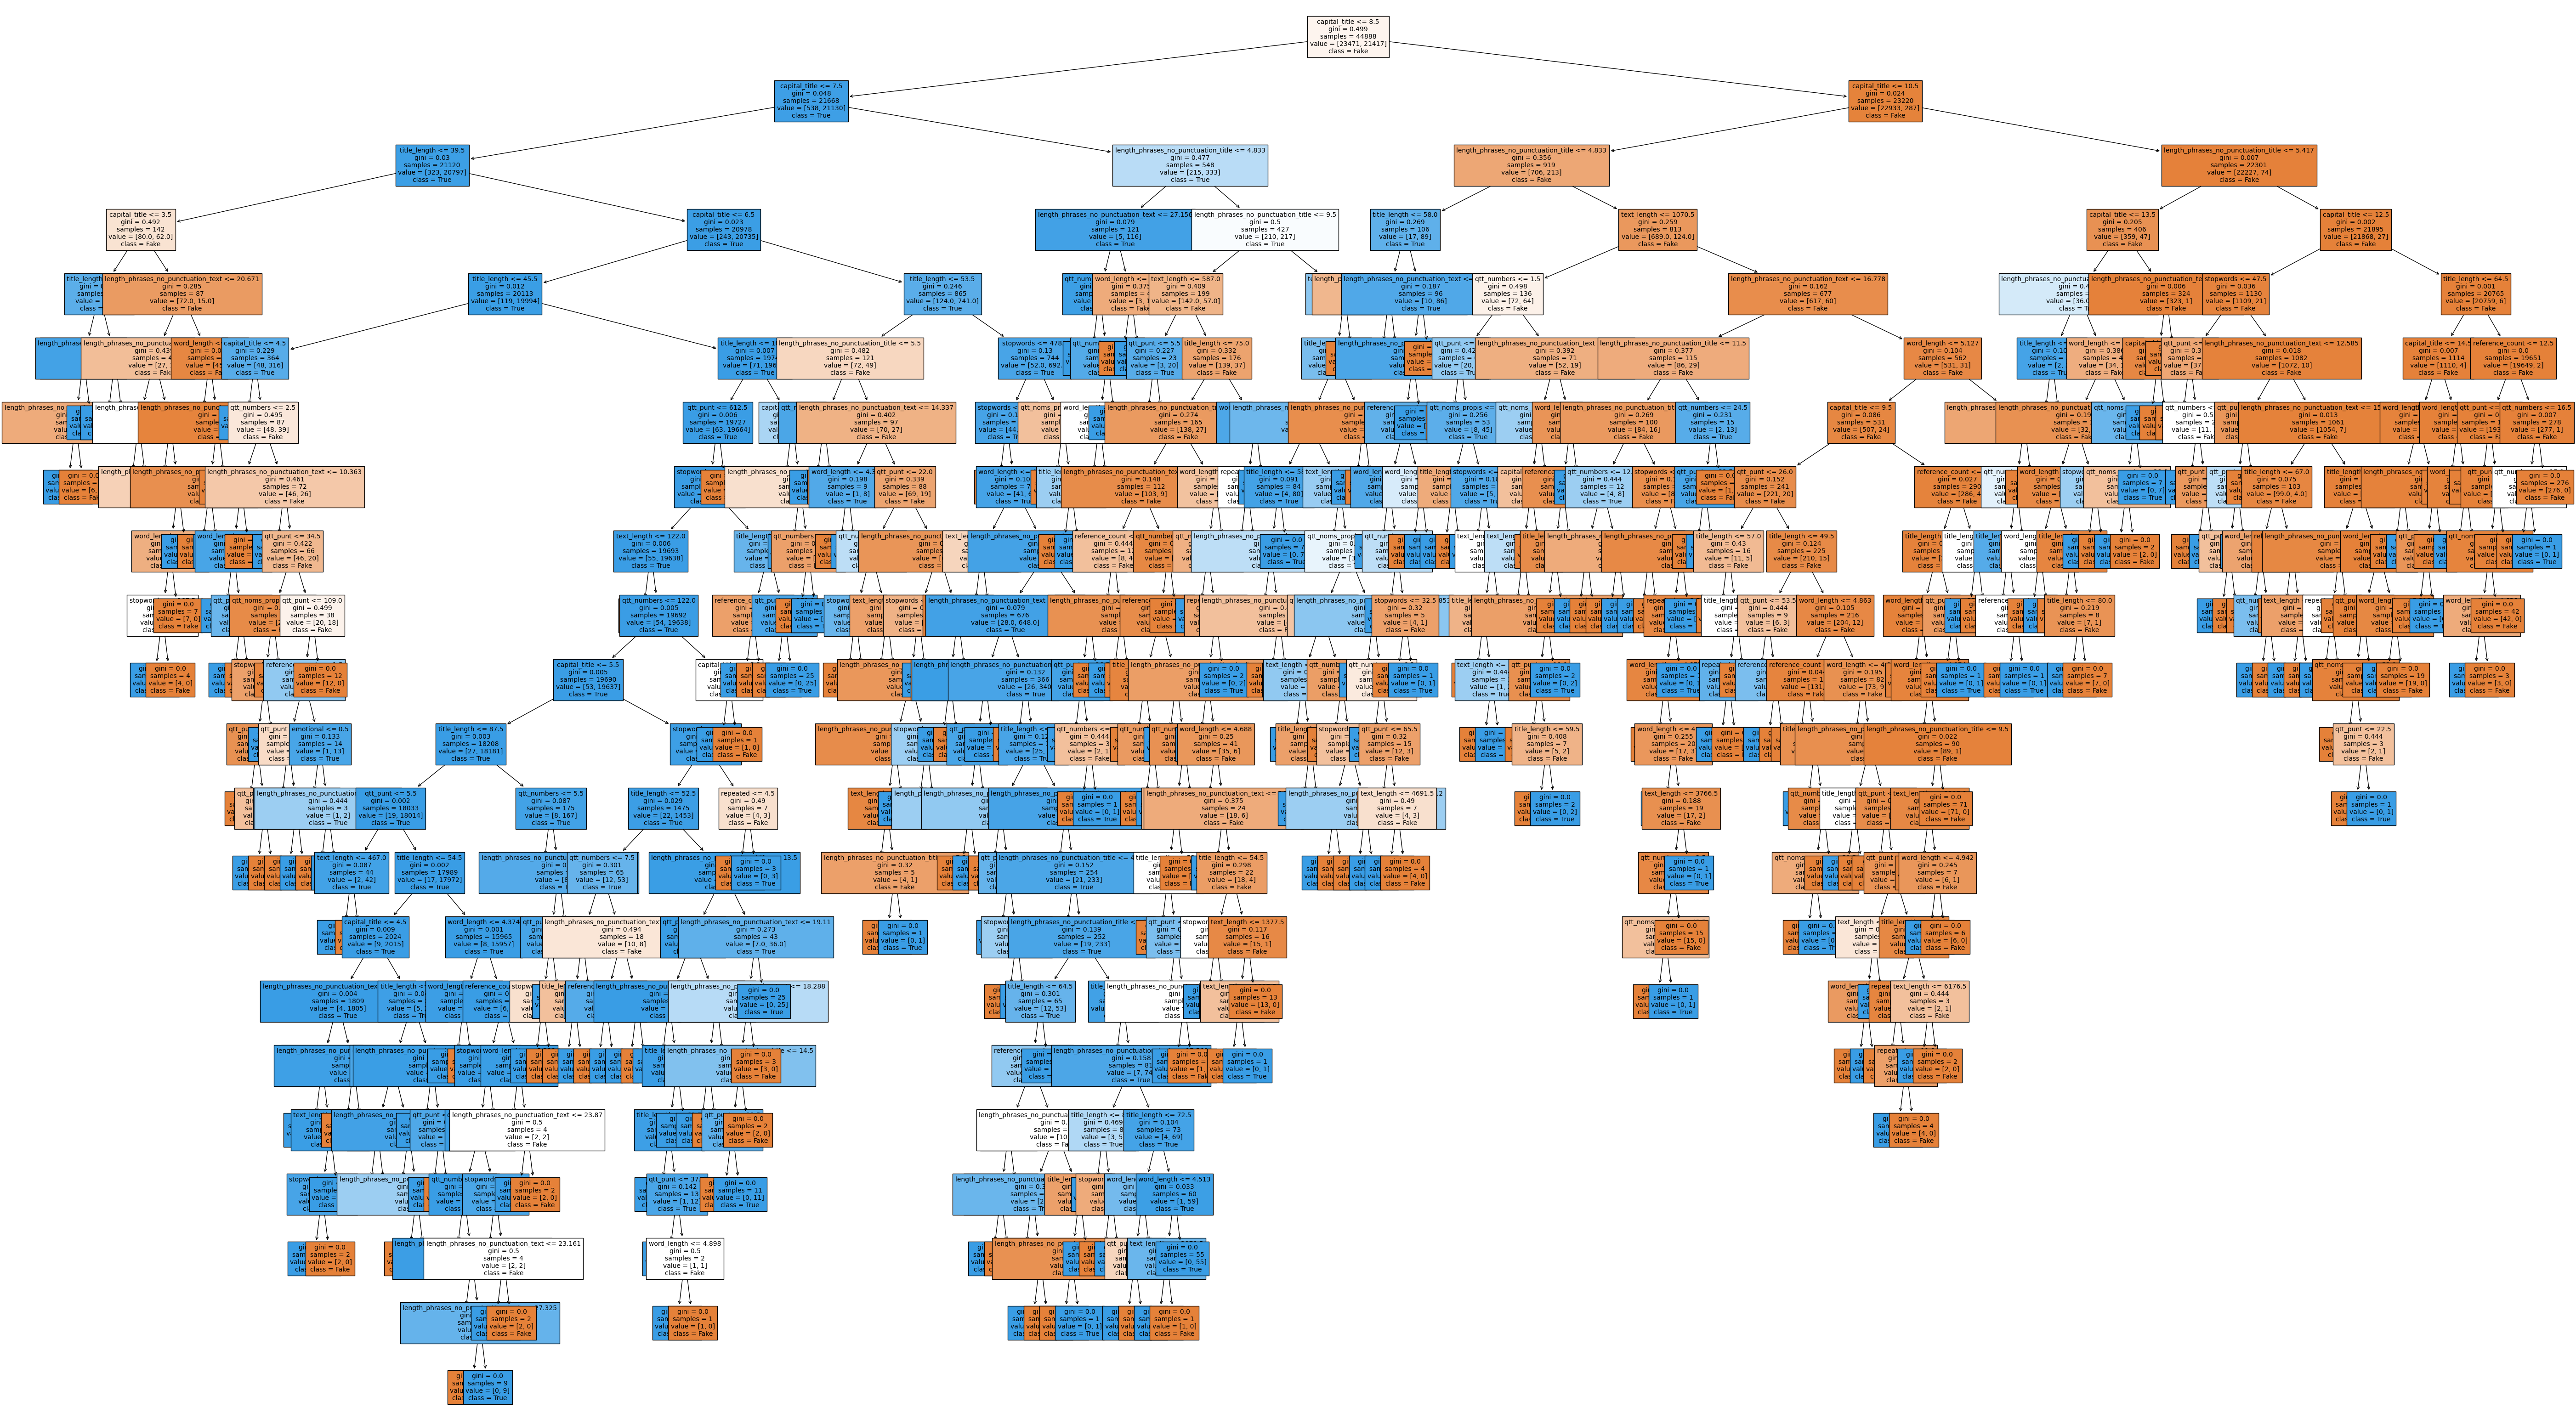

In [27]:
plt.figure(figsize=(70,40))  # set plot size (denoted in inches)
tree.plot_tree(dtree,
               class_names=["Fake", "True"],
               feature_names=list(X.columns), # label features with the column names from X
               filled=True, # color nodes to indicate majority class
               fontsize=10) 
plt.savefig('big_tree.png', bbox_inches='tight') # save plot as png file

Accuracy on training set: 0.984


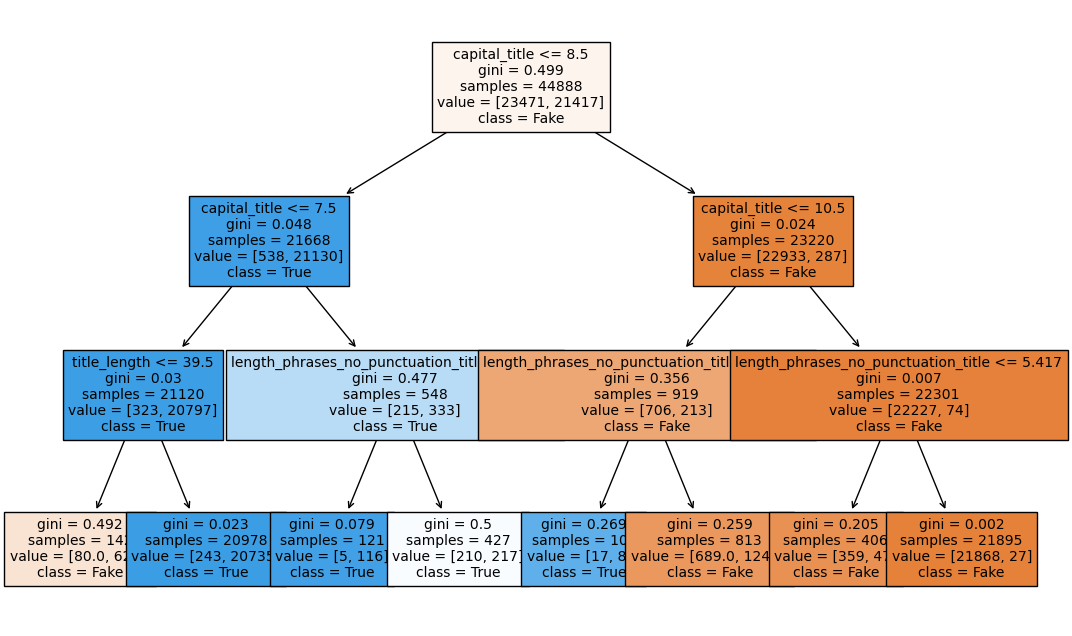

In [21]:
dtree = tree.DecisionTreeClassifier(max_depth=3) 
dtree.fit(X, y)
print("Accuracy on training set: {:.3f}".format(dtree.score(X, y)))
plt.figure(figsize=(13,8))  # set plot size (denoted in inches)
tree.plot_tree(dtree,
               class_names=["Fake", "True"],
               feature_names=list(X.columns), # label features with the column names from X
               filled=True, # color nodes to indicate majority class
               fontsize=10) 
plt.savefig('pruned_tree.png', bbox_inches='tight') # save plot as png file

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape

(31421, 13)

In [49]:
X_test.shape

(13467, 13)

In [51]:
dtree=tree.DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [53]:
y_pred=dtree.predict(X_test)
# Insert code here
print('Accuracy: ', sum(y_test==y_pred)/len(y_test)) # by hand

print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9826984480582164
Accuracy:  0.9826984480582164


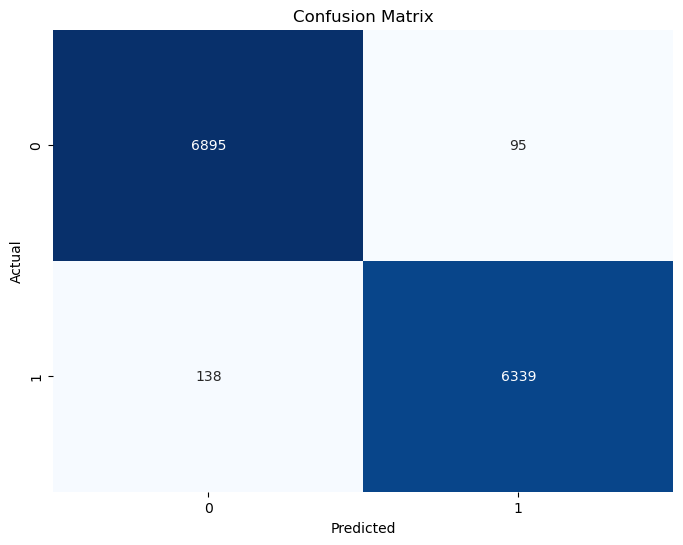

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()